In [46]:
import pandas as pd

In [2]:
#Importing the datasets
train=pd.read_csv(r"C:\Users\vinay\Desktop\titanic\train.csv")

In [3]:
test=pd.read_csv(r"C:\Users\vinay\Desktop\titanic\test.csv")

In [39]:
#The data types of the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [49]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
train.shape

(891, 8)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

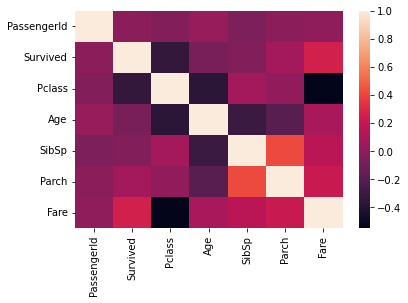

In [5]:
#Correlation table, heatmap for better visualization
import seaborn as sns
print(train.corr())
sns.heatmap(train.corr())

In [6]:
#Calculating the Null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#I have written this custom function so that we can identify the unique values of that specific column

def unique_cols(x):
    s=set()
    for i in train[x]:
        s.add(i)
    return s

print("Sex: ", unique_cols('Sex'))
print("Pclass: ",unique_cols('Pclass'))

Sex:  {'female', 'male'}
Pclass:  {1, 2, 3}


In [8]:
#Filled the NaN values of 'Age' with their mean value
train['Age']=train['Age'].fillna(train['Age'].mean())

In [9]:
#Dropping the Columns - Cabin, Name, Ticket, Embarked

train.drop('Cabin', axis=1, inplace=True)

In [10]:
train.drop('Name', axis=1, inplace=True)

In [11]:
train.drop('Ticket', axis=1, inplace=True)

In [12]:
train.drop('Embarked', axis=1, inplace=True)

In [13]:
#We can see that all the Null values are removed
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [15]:
#Since 'Sex' is a string, I have encoded it's unique attributes: Male, Female to 1, 2 respectively
train['Sex']=train['Sex'].map({'male':1, 'female':2})

In [16]:
unique_cols('Sex')

{1, 2}

In [17]:
#All the datatypes have been converted to numeric values
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
#Preparing the dataset for train, test split
data=train.drop('Survived', axis=1)
label=train['Survived']

In [20]:
#Splitting the dataset inorder to avoid overfitting
x_tr, x_ts, y_tr, y_ts=train_test_split(data, label)

In [21]:
#Built the Logistic Regression model
model=LogisticRegression(max_iter=900).fit(data, label)

In [22]:
#Predicted values
y_pr=model.predict(x_ts)

In [23]:
y_pr

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
#Accuracy calculations
score=accuracy_score(y_ts, y_pr)
score*100

82.51121076233184

In [26]:
#We perform the same Preprocessing steps for the Test dataset as well
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
#Preprocessing steps same as Train data:

test['Age']=test['Age'].fillna(test['Age'].mean())
test.drop('Cabin', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [28]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [29]:
test.shape

(418, 7)

In [30]:
# test.dropna(axis=1, inplace=True)
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [31]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [32]:
test.shape

(418, 7)

In [33]:
#Encoding the string values using a python Disctionary
test['Sex']=test['Sex'].map({'male':1, 'female':2})

In [34]:
#Model Prediction
pr_final=model.predict(test)

In [35]:
# data1=test['PassengerId']
# data2=pr_final

In [36]:
#Creating a dictionary for submission which includes PassengerID, Survived values

res=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':pr_final})

In [37]:
#Export the DataFrame to a csv file
res.to_csv("submission005.csv", index=False)

In [38]:
#References used for Syntaxes:

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#https://thecleverprogrammer.com/2021/07/01/calculation-of-accuracy-using-python/
#https://www.w3schools.com/python/python_dictionaries.asp
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html